<a href="https://colab.research.google.com/github/miguelsmachado/airbnb_la_analysis/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0**
*by [Miguel S. Machado](https://www.linkedin.com/in/miguel-machado-6655511a6/)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='once')

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2020-05-08/visualisations/listings.csv")

## Análise dos Dados

Antes de iniciar a análise propriamente dita, vamos padronizar algumas informações para que no decorrer do estudo todos possamos estar falando a mesma língua.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Vamos iniciar nossa análise dando uma rapida olhada como as variáveis apresentadas acima se mostram em nosso DataFrame.

In [65]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,38
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.17,1,97
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,24,2020-03-17,0.33,2,281
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.19,2,365
4,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,14,0,NaN,NaN,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Uma imformação muito importante é a quantidade de informação que possuimos, afinal, quanto maior o nosso banco de dados, mais qualidade teremos na análise.

In [66]:
# identificar o volume de dados do DataFrame
print(f"Entradas: {df.shape[0]}")
print(f"Variáveis: {df.shape[1]}")
print()

# verificar os tipos de cada variável do dataset
print("Tipos das Variáveis")
x = df.dtypes
x = pd.DataFrame(x)
x.columns = ['Tipo']
x.columns.name = 'Variáveis'
x

Entradas: 37048
Variáveis: 16

Tipos das Variáveis


Variáveis,Tipo
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Dados ausentes são um grande problema para análises, pois assim com os Outliers (veremos mais a frente), podem nos apresentar estudos e projeções com falhas. Por isso sempre é importante analisar a quantidade de dados ausente e quais as variáveis que possuem dados ausentes.

In [67]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print("Porcentagem de valores nulos por variável:\n")
x = ((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)
x = pd.DataFrame(x)
x.columns = ['Porcentagem']
x.columns.name = 'Variáveis'
x

Porcentagem de valores nulos por variável:



Variáveis,Porcentagem
reviews_per_month,20.61
last_review,20.61
host_name,0.01
name,0.01
availability_365,0.00
calculated_host_listings_count,0.00
number_of_reviews,0.00
minimum_nights,0.00
price,0.00
room_type,0.00


### **Q3. Qual o tipo de distribuição das variáveis?** 

A análise gráfica da distribuição da variável é um informação muito importante para vermos padrões e possíveis Outliers.
Outliers são dados que estão muito fora do resto do escopo apresentado e possivelmente estajam errados

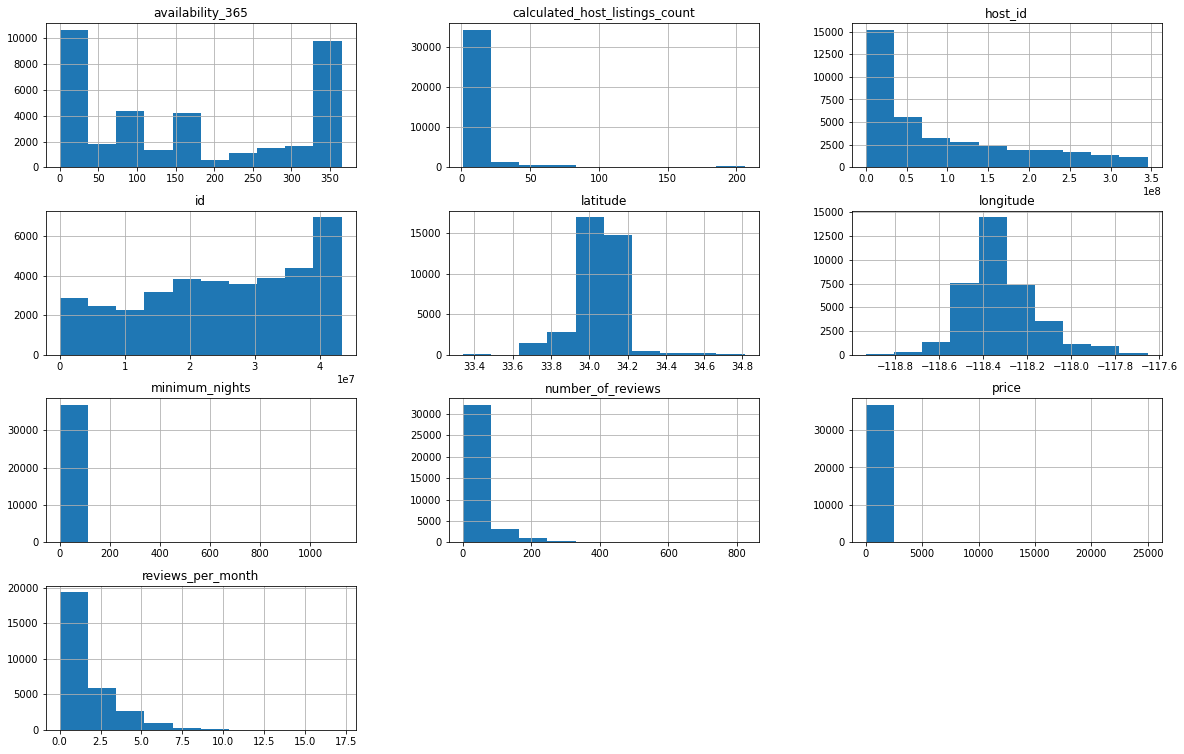

In [68]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(20,13));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, `number_of_reviews`, `reviews_per_night` e talvez `availiability_365`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

#### **Criando o BoxPlot (Com outliers)**

#####Inicialmente vamos separar as variáveis cujos valores sejam numéricos e esse valor possua uma relevância matematica. Por exemplo, apesar de ser um valor numérico, o `host_id` tem relevância para uma análise matematica.

In [0]:
num_data = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']

In [70]:
df[num_data].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,37048.000000,37048.000000,37048.000000,29413.000000,37048.000000,37048.000000
mean,227.916379,12.715369,35.201387,1.605461,8.125513,168.061353
std,685.160627,26.759290,64.277015,1.750648,23.030745,142.799526
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.300000,1.000000,5.000000
50%,109.000000,3.000000,8.000000,0.960000,2.000000,153.000000
75%,185.000000,30.000000,40.000000,2.410000,5.000000,336.000000
max,25000.000000,1125.000000,822.000000,17.230000,206.000000,365.000000


#####Após a análise do `describe()`, podemos rapidamente verificar quais variáveis possuem outliers. Basicamente, quando temos uma média muito diferente de um mediana, isso é um sinal de outliers e podemos observar isso em todas as variáveis, exceto em **availability_365**

#### **Criando o BoxPlot (Com outliers)**

#####Agora vamos visualizar o mesmo problema, porem se uma perspectiva gráfica, utilizando *BOXPLOT*

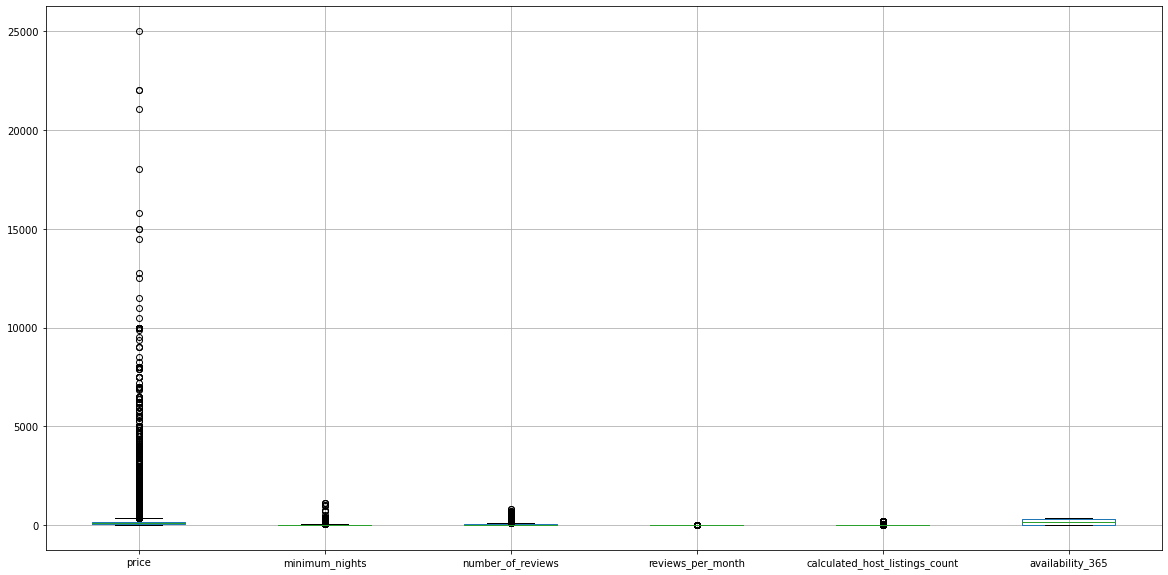

In [81]:
df.boxplot(column=num_data, figsize=(20,10));

##### Como podemos ver acima, temos uma grando quantidade de outliers em quase todos, as variáveis verificadas. A única que não apresenta outliers é **avaliability_365**, conforme já haviamos levantado com o `describe()`


<img alt="Limites Box plot" width="15%" src="https://drive.google.com/file/d/1vll9n4ZHvSmTy4kOaGi0lsVZM5_tt8-4/view?usp=sharing">

#### **Removendo Outliers**

In [0]:
for x in num_data:

  # estabelecendo os parâmetros
  Q1 = df[x].quantile(.25)
  Q3 = df[x].quantile(.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ

  # criando a seleção:
  selecao = (df[x] >= limite_inferior) & (df[x] <= limite_superior)
  
  # removendo os outliers
  df = df[selecao]

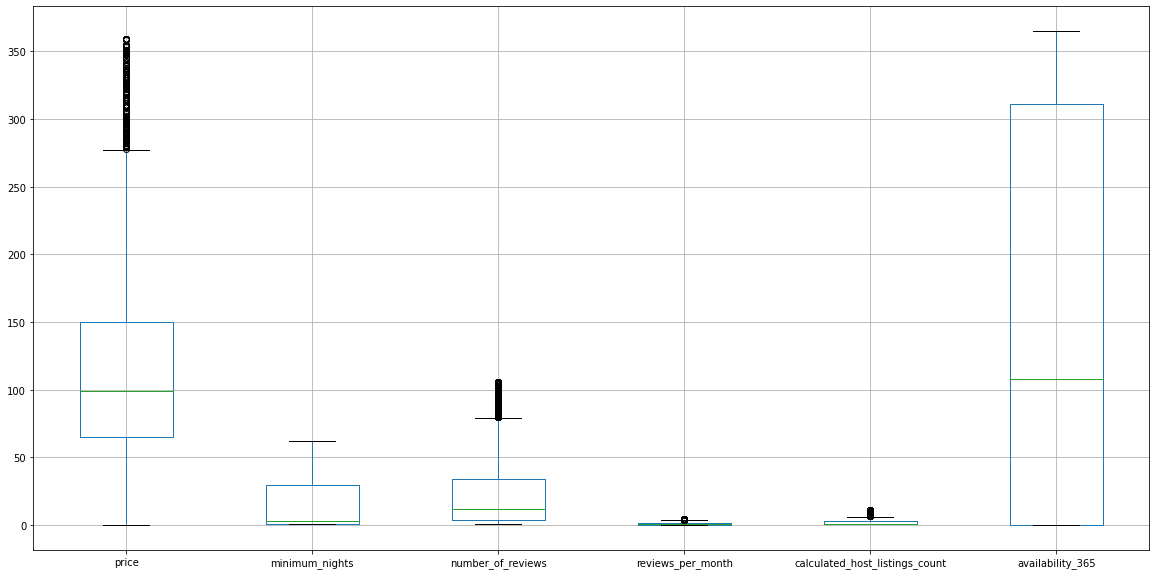

In [0]:
df.boxplot(column=num_data, figsize=(20,10));

#####Como podemos ver, os outliers iniciais foram removidos, agora já conseguimos enxergar os *boxplots*
Esses novos outliers que se apresentam, já eram esperados, pois como os anteriores foram removidos, os limites inferiores e superiores mudam, gerando novos outliers.

####Histogramas sem outlier

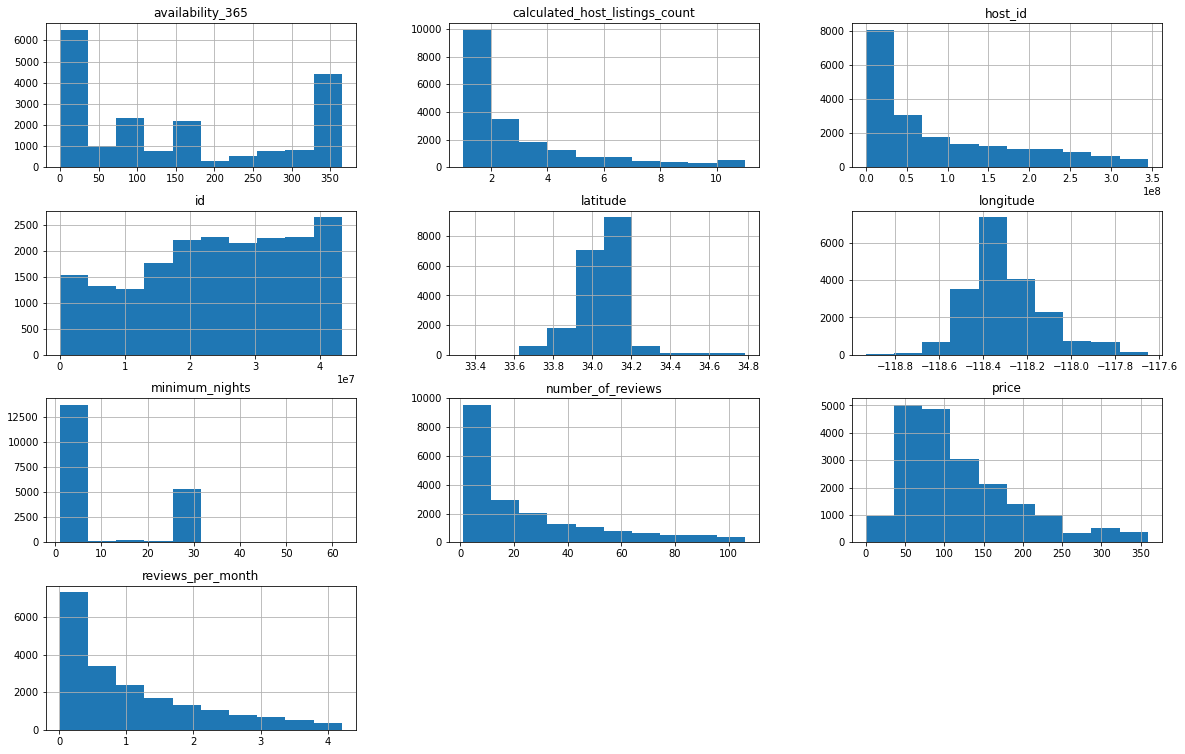

In [86]:
df.hist(figsize=(20,13));

### **Q4. Qual a média dos preços de aluguel?**



#####Agora com os Outliers removidos, podemos calcular o preço médio e obter um valor mais próximo ao real.
O preço médio antes era de: 227.91

In [84]:
# ver a média da coluna `price``
print(f'Com os outliers removidos, o preço médio passa a ser: {round(df.price.mean(), 2)}')

Com os outliers removidos, o preço médio passa a ser: 119.02


### **Q4. Qual a correlação existente entre as variáveis**

In [85]:
# mostrar a matriz de correlação
df[num_data].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.000958,0.038773,0.033001,-0.071918,0.061268
minimum_nights,0.000958,1.000000,-0.033592,-0.191875,0.042489,0.086167
number_of_reviews,0.038773,-0.033592,1.000000,0.626443,0.018358,0.111761
reviews_per_month,0.033001,-0.191875,0.626443,1.000000,0.062323,0.060717
calculated_host_listings_count,-0.071918,0.042489,0.018358,0.062323,1.000000,0.226342
availability_365,0.061268,0.086167,0.111761,0.060717,0.226342,1.000000


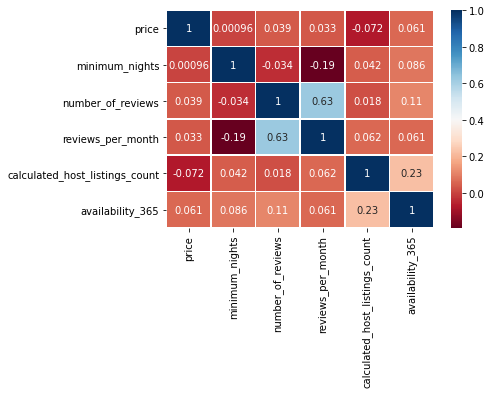

In [93]:
# plotar um heatmap a partir das correlações
sns.heatmap(df[num_data].corr(), cmap='RdBu', annot=True, linewidths=.5);

#####Como pode-se verificar, os valores não posseum nenhuma grande correlação, exceto `number_of_review` x `review_per_month`, o que já era de se esperar uma vez que são diretamente dependentes.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Nosso DataFrame possui e variável `room_type` que mostra qual o tipo de quarto está sendo falado. Qual será o tipo de quarto mais alugado em Los Angeles? Vamos descobrir!.

In [104]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts().to_frame()

,room_type
Entire home/apt,11712
Private room,7506
Shared room,377
Hotel room,38


In [109]:
# mostrar a porcentagem de cada tipo de imóvel disponível
porcento_room_type = (df['room_type'].value_counts() / df['room_type'].shape[0]) * 100
porcento_room_type.to_frame()

,room_type
Entire home/apt,59.654663
Private room,38.231549
Shared room,1.920236
Hotel room,0.193552


### **Q6. Qual a localidade mais cara do dataset?**

Não é sempre que viajamos para Los Angeles! Que tal aproveitarmos a viagem para ficar em um dos 10 lugares mais caros da cidade???
Vamos ver quais são nossas escolhas:


In [119]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2).head(10).to_frame()

,price
neighbourhood,
Lake Hughes,300.00
Avalon,257.93
Malibu,241.21
North Whittier,240.00
East Whittier,201.33
Palos Verdes Estates,199.50
Rolling Hills Estates,182.25
Unincorporated Santa Monica Mountains,180.02
Marina del Rey,178.35


#####Ficou um pouco complicado escolher um dos TOP 10 no preço?!
Vou te dar uma ajuda!
Abaixo temos um mapa com todos os imóveis separados por faixas de valores.
É só escolher!

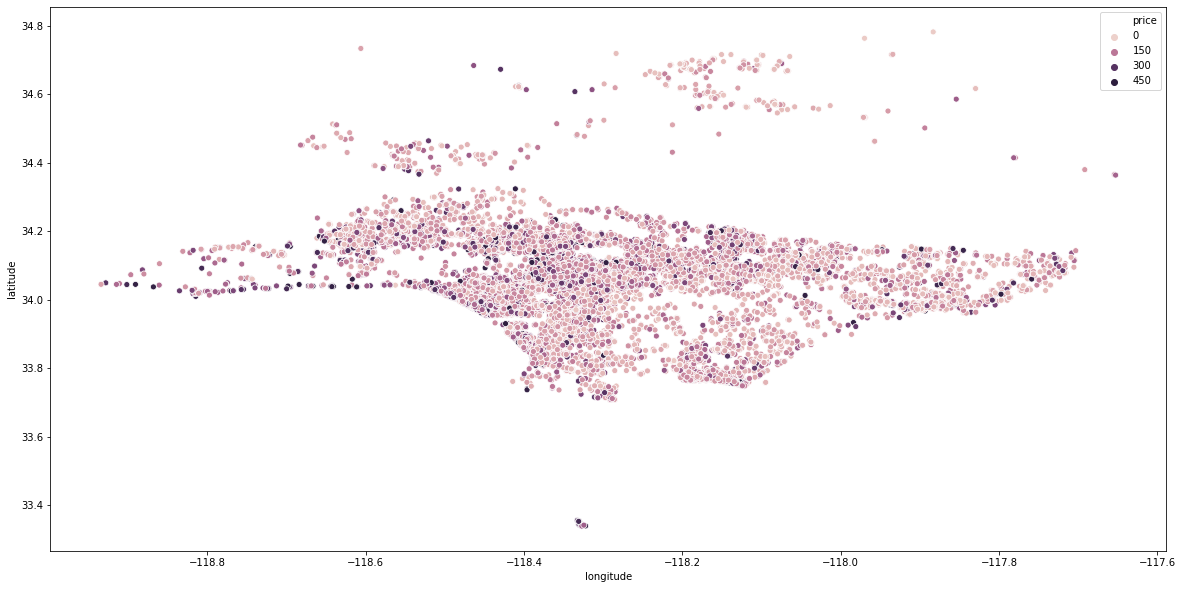

In [127]:
# plotar os imóveis pela latitude-longitude
ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='price')
ax.figure.set_size_inches(20,10)

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Muitos hosts exigem um mínimo de noites para que aluguem suas casas e apartamentos.
Antes de planejar sua viagem, vamos verificar a média de dias que os hosts solicitam: 

In [133]:
# ver a média da coluna `minimum_nights``
min_noite_media = round(df.minimum_nights.mean(), 2)
print(f'Os hosts pedem que seus hospedes fiquem por {min_noite_media} noites')

Os hosts pedem que seus hospedes fiquem por 10.35 noites


## Conclusões

Apesar de ser uma anaálise bem simples, podemos levantar diversas informações muito relevantes para quem quer alugar ou anunciar um apartamento pelo AirBnb em Los Angeles.
Todas as informações aqui apresentadas apesar de estarem disponíveis na internet, uma simples busca no Google não trará as respostas que aqui foram apresentadas.
Por isso, deixo como mensagem final a importância do Curso de Data Science na Prática, pois além de nos apresentar a **profissão do futuro**, nos apresenta a uma ferramenta que pode nos ajudar a otimizar e resolver diversos problemas do nosso dia-a-dia!
